# Calculating Lagrangian trajectories for coupled simulation

## Loading modules

In [1]:
%matplotlib inline
from parcels import (FieldSet, ParticleSet,
                     JITParticle, ScipyParticle,
                     AdvectionRK4)
from glob import glob
import xarray as xr
import numpy as np
from datetime import timedelta, datetime

## Create fieldset

In [2]:
datapath = '/Users/siren/Data/IMMERSE/'
filepaths_u = sorted(glob(datapath + 'surface_TKE_CO_FORCE_MIX_LC015/MED24_OBC_1d*_grid_U.nc'))
filepaths_v = sorted(glob(datapath + 'surface_TKE_CO_FORCE_MIX_LC015/MED24_OBC_1d*_grid_V.nc'))
gridpath = (datapath + 'domain/fgrid.nc')

In [3]:
filenames = {'U': {'lon': gridpath, 'lat': gridpath, 'data': filepaths_u},
             'V': {'lon': gridpath, 'lat': gridpath, 'data': filepaths_v}}
variables = {'U': 'vozocrtx',
             'V': 'vomecrty'}
variables_sd = {'U': 'usd',
                'V': 'vsd'}
dimensions = {'U': {'lon': 'glamf', 'lat': 'gphif', 'time': 'time_counter'},
              'V': {'lon': 'glamf', 'lat': 'gphif', 'time': 'time_counter'}}

In [4]:
fieldset = FieldSet.from_nemo(filenames, variables, dimensions,
                              allow_time_extrapolation=False,
                              time_periodic=False,
                              mesh='spherical')
fieldset_sd = FieldSet.from_nemo(filenames, variables_sd, dimensions,
                                 allow_time_extrapolation=False,
                                 time_periodic=False,
                                 mesh='spherical')
fieldset_sum = FieldSet(U=fieldset.U+fieldset_sd.U, V=fieldset.V+fieldset_sd.V)

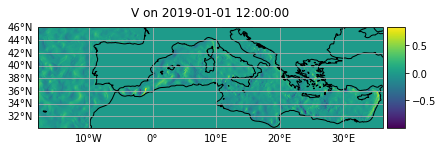

In [5]:
fieldset.V.show()

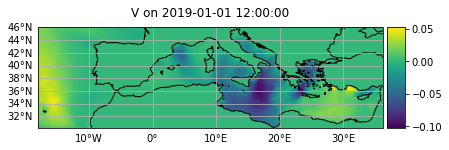

In [6]:
fieldset_sd.V.show()

## Build and execute particle set using (summed) velocities

In [30]:
fieldset_use = fieldset_sum
outpath = '/Users/siren/IMMERSE_waves/develop-mac/data/Traj-coupled-sd.nc'

#fieldset_use = fieldset
#outpath = '/Users/siren/IMMERSE_waves/develop-mac/data/Traj-coupled.nc'

### Create starting positions

In [31]:
lonmin = 3.5
lonmax = 4.5
latmin = 42
latmax = 43
step = 1/6
lons, lats = np.meshgrid(np.arange(lonmin, lonmax+step, step), np.arange(latmin, latmax+step, step))

In [32]:
nparticles=lons.shape[0]*lons.shape[1]
nparticles

56

In [33]:
pset = ParticleSet(fieldset=fieldset_use,
                   pclass=ScipyParticle,
                   lon=lons, lat=lats)
pset.populate_indices()

In [34]:
#plotstep=4
#pset.show(field=fieldset_use.U,
#          domain={'N':(latmax+plotstep/2),'S':(latmin-plotstep),
#                  'E': (lonmax+plotstep), 'W':(lonmin-plotstep)})

###!!! QUESTION: Why can combined fieldset not be plotted?

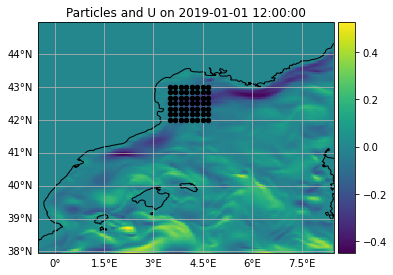

In [35]:
plotstep=4
pset.show(field=fieldset.U,
          domain={'N':(latmax+plotstep/2),'S':(latmin-plotstep),
                  'E': (lonmax+plotstep), 'W':(lonmin-plotstep)})

### Calculate trajectories

In [36]:
outfile = pset.ParticleFile(outpath, 
                            outputdt=timedelta(days=1))
kernels = pset.Kernel(AdvectionRK4)
pset.execute(kernels,
             runtime=timedelta(days=10), dt=timedelta(hours=6),
             output_file=outfile)
outfile.export()
#outfile.close()

In [37]:
#plotstep=4
#pset.show(field=fieldset_use.U,
#          domain={'N':(latmax+plotstep/2),'S':(latmin-plotstep),
#                 'E': (lonmax+plotstep), 'W':(lonmin-plotstep)})

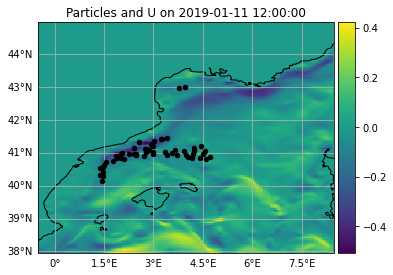

In [38]:
plotstep=4
pset.show(field=fieldset.U,
          domain={'N':(latmax+plotstep/2),'S':(latmin-plotstep),
                 'E': (lonmax+plotstep), 'W':(lonmin-plotstep)})